In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_train[0].shape

(32, 32, 3)

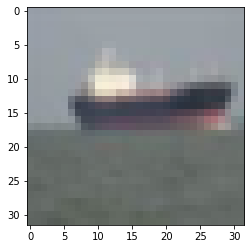

In [11]:
plt.imshow(x_train[69])

In [13]:
x_train[0].max()

255

In [14]:
x_train = x_train/255

In [15]:
x_test = x_test/255

In [16]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
y_cat_train = to_categorical(y_train,10)

In [20]:
y_cat_test = to_categorical(y_test,10)

In [21]:
y_test[0]

array([3], dtype=uint8)

In [22]:
y_train[0]

array([6], dtype=uint8)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [29]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation = 'softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])          

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [31]:
from tensorflow.keras.callbacks import EarlyStopping

In [32]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [33]:
model.fit(x_train,y_cat_train,epochs=15,
         validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 47s 29ms/step - loss: 1.7249 - accuracy: 0.3674 - val_loss: 1.2371 - val_accuracy: 0.5551
Epoch 2/15
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1821 - accuracy: 0.5798 - val_loss: 1.1518 - val_accuracy: 0.5939
Epoch 3/15
1563/1563 [==============================] - 50s 32ms/step - loss: 1.0345 - accuracy: 0.6365 - val_loss: 1.0275 - val_accuracy: 0.6395
Epoch 4/15
1563/1563 [==============================] - 48s 31ms/step - loss: 0.9010 - accuracy: 0.6872 - val_loss: 0.9841 - val_accuracy: 0.6610
Epoch 5/15
1563/1563 [==============================] - 49s 31ms/step - loss: 0.8031 - accuracy: 0.7210 - val_loss: 0.9600 - val_accuracy: 0.6748
Epoch 6/15
1563/1563 [==============================] - 48s 31ms/step - loss: 0.7087 - accuracy: 0.7560 - val_loss: 0.9475 - val_accuracy: 0.6752
Epoch 7/15
1563/1563 [==============================] - 49s 31ms/step - loss: 0.6446 - accuracy: 0.7756 - val_loss: 0.9758 -

In [34]:
metrics = pd.DataFrame(model.history.history)

In [35]:
metrics.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<AxesSubplot:>

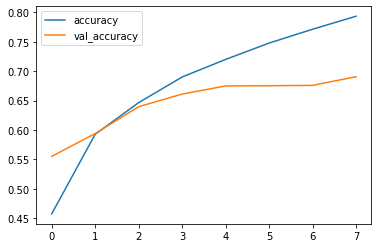

In [36]:
metrics[['accuracy','val_accuracy']].plot()

<AxesSubplot:>

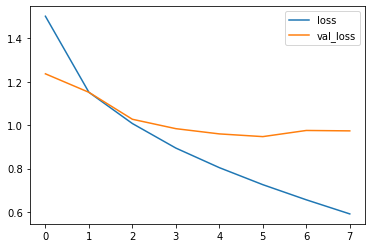

In [37]:
metrics[['loss','val_loss']].plot()

In [38]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.9739462733268738, 0.690500020980835]

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
predictions = model.predict_classes(x_test)

c:\users\varun\anaconda3\envs\mytf2env\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1000
           1       0.74      0.86      0.80      1000
           2       0.58      0.57      0.58      1000
           3       0.56      0.46      0.50      1000
           4       0.57      0.72      0.63      1000
           5       0.65      0.53      0.59      1000
           6       0.72      0.82      0.77      1000
           7       0.79      0.70      0.74      1000
           8       0.80      0.78      0.79      1000
           9       0.80      0.73      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



<AxesSubplot:>

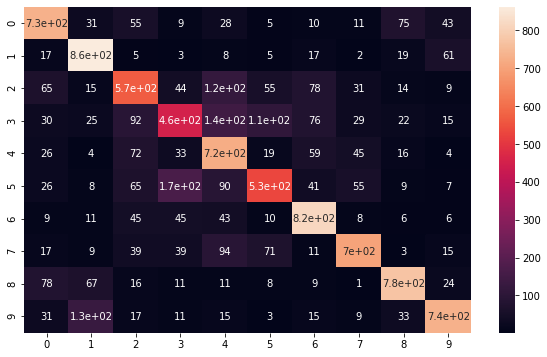

In [43]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions),annot=True)

In [44]:
my_image = x_test[0]

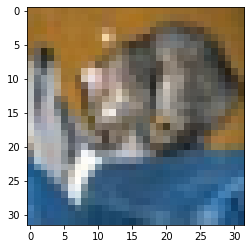

In [45]:
plt.imshow(my_image)

In [46]:
model.predict_classes(my_image.reshape(1,32,32,3))

c:\users\varun\anaconda3\envs\mytf2env\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([3], dtype=int64)